# Business Context:
● Customer segmentation is one of the most important marketing tools at your disposal, because it can help a business to better understand its target audience. This is because it groups customers based on common characteristics. ● Segmentation can be based on the customer’s habits and lifestyle, in particular, their buying habits. Different age groups, for example, tend to spend their money in different ways, so brands need to be aware of who exactly is buying their product. ● Segmentation also focuses more on the personality of the consumer, including their opinions, interests, reviews, and rating. Breaking down a large customer base into more manageable clusters, making it easier to identify your target audience and launch campaigns and promote the business to the most relevant people


Data Citation: ● Rishabh Misra, Mengting Wan, Julian McAuley "Decomposing Fit Semantics for Product Size Recommendation in Metric Spaces". RecSys, 2018. ● Rishabh Misra, Jigyasa Grover "Sculpting Data for ML: The first act of Machine Learning". 2021.

Dataset Description: The dataset contains measurements of clothing fit from RentTheRunway. RentTheRunWay is a unique platform that allows women to rent clothes for various occasions. The collected data is of several categories. This dataset contains self-reported fit feedback from customers as well as other side information like reviews, ratings, product categories, catalog sizes, customers’ measurements (etc.)

In [123]:
# importing libraries

import pandas as pd                                                 
pd.set_option('display.max_columns', None)                              
pd.set_option('display.max_colwidth', None)                           

import numpy as np

import matplotlib.pyplot as plt 
plt.style.use('dark_background')
import seaborn as sns                                              
sns.set(style='whitegrid')
sns.color_palette('dark')
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.cluster import KMeans
from scipy.stats import zscore
from scipy.spatial import distance
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer

import warnings
warnings.filterwarnings('ignore')

In [124]:
# read the dataset

df = pd.read_csv('renttherunway.csv', index_col=False)
df.head(5)

,Unnamed: 0,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,0,fit,420272,34d,2260466,137lbs,10.0,vacation,"An adorable romper! Belt and zipper were a little hard to navigate in a full day of wear/bathroom use, but that's to be expected. Wish it had pockets, but other than that-- absolutely perfect! I got a million compliments.",hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,1,fit,273551,34b,153475,132lbs,10.0,other,"I rented this dress for a photo shoot. The theme was ""Hollywood Glam and Big Beautiful Hats"". The dress was very comfortable and easy to move around in. It is definitely on my list to rent again for another formal event.",straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a perfect dress for my event and I received so many compliments on it. Not to mention customer service was great getting this to me in less than 24 hours!,NaN,It was a great time to celebrate the (almost) completion of my first year of law school.,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,3,fit,909926,34c,126335,135lbs,8.0,formal affair,"I rented this for my company's black tie awards banquet. I liked that this dress was short but was a little fancier with the sequins. (I generally don't care for long dresses.) I would describe the color as more rose gold than yellow gold. I have blonde hair and fair skin, and the color was very flattering. This is a very forgiving dress! It's form fitting without making you feel like you're squeezed into it. I would rent this one again. Highly recommend!",pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,4,fit,151944,34b,616682,145lbs,10.0,wedding,"I have always been petite in my upper body and extremely athletic. \nI'm 5'9 and typically am a size 4,6,8 due to the fact I had a smaller upper frame and 34B cup. Depends what fabric were talking about too! \nHowever, because I have been lifting weights my back has grown (odd to add- but figured I'd say it knowing other people lift weights) My lat area is so wide that I was suffocating in a size 6. If I wasn't as muscular in my back I would've been fine. I would recommend to go up a size if you are into lifting weights and very broad in your upper body.",athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      192544 non-null  int64  
 1   fit             192544 non-null  object 
 2   user_id         192544 non-null  int64  
 3   bust size       174133 non-null  object 
 4   item_id         192544 non-null  int64  
 5   weight          162562 non-null  object 
 6   rating          192462 non-null  float64
 7   rented for      192534 non-null  object 
 8   review_text     192482 non-null  object 
 9   body type       177907 non-null  object 
 10  review_summary  192199 non-null  object 
 11  category        192544 non-null  object 
 12  height          191867 non-null  object 
 13  size            192544 non-null  int64  
 14  age             191584 non-null  float64
 15  review_date     192544 non-null  object 
dtypes: float64(2), int64(4), object(10)
memory usage: 23.5+ 

In [126]:
df.shape

(192544, 16)

In [127]:
## Lets check the statistical summary of the data
ds=df.drop(columns=['user_id','item_id','Unnamed: 0'],axis=1)
ds.describe()

,rating,size,age
count,192462.000000,192544.000000,191584.000000
mean,9.092371,12.245175,33.871017
std,1.430044,8.494877,8.058083
min,2.000000,0.000000,0.000000
25%,8.000000,8.000000,29.000000
50%,10.000000,12.000000,32.000000
75%,10.000000,16.000000,37.000000
max,10.000000,58.000000,117.000000


# DATA CLEANSING AND EXPLORATORY DATA ANALYSIS

In [128]:
# Check if there are any duplicate records in the dataset? If any, drop them.
def ifDuplicateSamples(data):
  dd = data.duplicated().sum()
  if dd == 0:
    print("There are no duplicate rows")
    return
  else:
    print("There are ",dd,"duplicate rows")

#running it on current data
ifDuplicateSamples(df)

There are no duplicate rows


In [129]:
df.shape

(192544, 16)

In [130]:
df.isnull().sum()

Unnamed: 0            0
fit                   0
user_id               0
bust size         18411
item_id               0
weight            29982
rating               82
rented for           10
review_text          62
body type         14637
review_summary      345
category              0
height              677
size                  0
age                 960
review_date           0
dtype: int64

In [131]:
# Drop the columns redundant for the analysis
df.drop(columns= ['Unnamed: 0','review_date', 'review_text','review_summary'],inplace=True)
df.head(5)

,fit,user_id,bust size,item_id,weight,rating,rented for,body type,category,height,size,age
0,fit,420272,34d,2260466,137lbs,10.0,vacation,hourglass,romper,"5' 8""",14,28.0
1,fit,273551,34b,153475,132lbs,10.0,other,straight & narrow,gown,"5' 6""",12,36.0
2,fit,360448,NaN,1063761,NaN,10.0,party,NaN,sheath,"5' 4""",4,116.0
3,fit,909926,34c,126335,135lbs,8.0,formal affair,pear,dress,"5' 5""",8,34.0
4,fit,151944,34b,616682,145lbs,10.0,wedding,athletic,gown,"5' 9""",12,27.0


In [132]:
df.drop(columns=['user_id','item_id'],inplace=True)
df.head(5)

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,fit,34d,137lbs,10.0,vacation,hourglass,romper,"5' 8""",14,28.0
1,fit,34b,132lbs,10.0,other,straight & narrow,gown,"5' 6""",12,36.0
2,fit,NaN,NaN,10.0,party,NaN,sheath,"5' 4""",4,116.0
3,fit,34c,135lbs,8.0,formal affair,pear,dress,"5' 5""",8,34.0
4,fit,34b,145lbs,10.0,wedding,athletic,gown,"5' 9""",12,27.0


In [133]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rating,192462.0,9.092371,1.430044,2.0,8.0,10.0,10.0,10.0
size,192544.0,12.245175,8.494877,0.0,8.0,12.0,16.0,58.0
age,191584.0,33.871017,8.058083,0.0,29.0,32.0,37.0,117.0


Observation: There are three numerical features. 

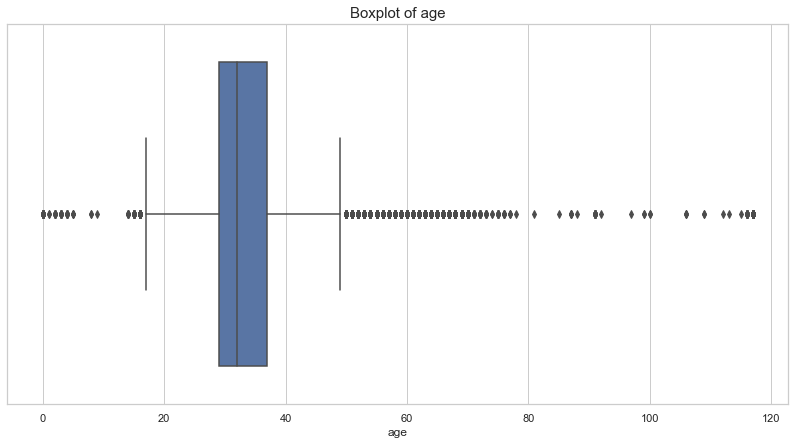

In [134]:
# Check outliers present in the column age? If yes, treat the data
plt.figure(figsize=(14,7))
sns.boxplot(x=df['age'])
plt.title("Boxplot of age", fontsize=15)
plt.show()


In [135]:
df.groupby('age').rating.mean()

age
0.0       9.333333
1.0       9.000000
2.0       9.800000
3.0       9.500000
4.0      10.000000
           ...    
112.0     8.000000
113.0     8.000000
115.0     8.000000
116.0     9.444444
117.0     9.384615
Name: rating, Length: 89, dtype: float64

In [136]:
# Check statastics of numerical features for age >= 100 and drop the data
df[df.age >= 100].describe().T

,count,mean,std,min,25%,50%,75%,max
rating,67.0,9.253731,1.197767,4.0,8.0,10.0,10.0,10.0
size,67.0,10.776119,11.213927,0.0,4.0,8.0,16.0,51.0
age,67.0,115.328358,3.783489,100.0,116.0,117.0,117.0,117.0


In [137]:
df.drop(df[df['age'] >= 100].index, inplace = True)

In [138]:
# Check statastics of numerical features for age >= 65 and drop the data
df[df.age >= 65].describe().T

,count,mean,std,min,25%,50%,75%,max
rating,548.0,9.109489,1.484491,2.0,8.0,10.0,10.0,10.0
size,548.0,16.998175,9.723696,1.0,8.0,16.0,24.0,57.0
age,548.0,68.791971,5.655284,65.0,66.0,67.0,69.0,99.0


In [139]:
df.drop(df[df['age'] >= 65].index, inplace = True)

In [140]:
# Check the samples and statastics of numerical features for age <= 10 and drop the data
df[df.age <= 16].sample(15)

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
68406,fit,34c,140lbs,8.0,party,NaN,dress,"5' 8""",16,15.0
2029,fit,34b,125lbs,10.0,other,straight & narrow,dress,"5' 7""",4,0.0
174085,large,32b,125lbs,10.0,formal affair,NaN,dress,"5' 9""",4,16.0
169454,fit,32c,120lbs,10.0,other,athletic,dress,"5' 3""",4,16.0
132229,fit,NaN,110lbs,10.0,wedding,hourglass,gown,"5' 5""",4,4.0
179206,fit,32c,120lbs,10.0,formal affair,athletic,dress,"5' 5""",4,16.0
112861,large,34dd,150lbs,8.0,formal affair,full bust,dress,"5' 5""",24,16.0
107849,fit,32b,110lbs,10.0,other,petite,dress,"5' 6""",1,16.0
135714,small,38d,NaN,10.0,formal affair,hourglass,gown,"5' 3""",51,15.0
109264,fit,NaN,110lbs,10.0,formal affair,hourglass,sheath,"5' 5""",8,4.0


In [141]:
df[df.age <= 16].describe().T

,count,mean,std,min,25%,50%,75%,max
rating,134.0,9.447761,1.306819,2.0,10.0,10.0,10.00,10.0
size,134.0,11.223881,9.473066,0.0,4.0,8.0,15.75,51.0
age,134.0,9.149254,6.880841,0.0,2.0,14.0,16.00,16.0


In [142]:
df.drop(df[df['age'] <= 16].index, inplace = True)

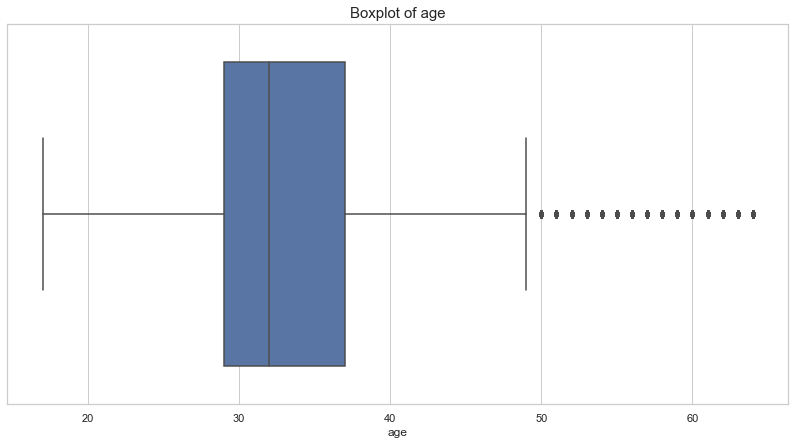

In [143]:
# Check outliers present in the column age? If yes, treat the data
plt.figure(figsize=(14,7))
sns.boxplot(x=df['age'])
plt.title("Boxplot of age", fontsize=15)
plt.show()

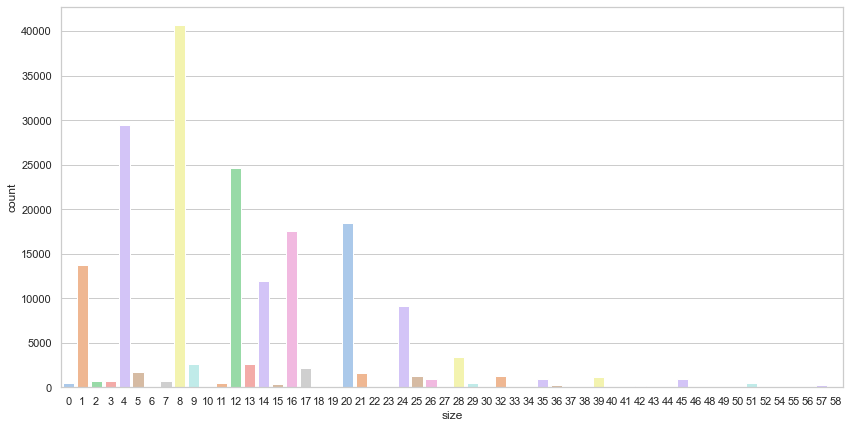

In [144]:
# Check the possible sizes in this dataset
plt.figure(figsize=(14,7))
sns.countplot(data=df,x='size', palette='pastel')
plt.show()

In [145]:
df[['age','rating']].describe().T

,count,mean,std,min,25%,50%,75%,max
age,190835.0,33.759499,7.667132,17.0,29.0,32.0,37.0,64.0
rating,191713.0,9.092018,1.430018,2.0,8.0,10.0,10.0,10.0


In [146]:
df.isnull().sum()

fit               0
bust size     18329
weight        29894
rating           82
rented for       10
body type     14593
category          0
height          672
size              0
age             960
dtype: int64

In [147]:
#  fill the place of nulls with median for age and rating
df['age'].fillna(df['age'].median(), inplace=True)
df['rating'].fillna(df['rating'].median(), inplace=True)

In [148]:
df.isnull().sum()

fit               0
bust size     18329
weight        29894
rating            0
rented for       10
body type     14593
category          0
height          672
size              0
age               0
dtype: int64

In [149]:
df.head(5)

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,fit,34d,137lbs,10.0,vacation,hourglass,romper,"5' 8""",14,28.0
1,fit,34b,132lbs,10.0,other,straight & narrow,gown,"5' 6""",12,36.0
3,fit,34c,135lbs,8.0,formal affair,pear,dress,"5' 5""",8,34.0
4,fit,34b,145lbs,10.0,wedding,athletic,gown,"5' 9""",12,27.0
5,fit,32b,138lbs,8.0,date,athletic,dress,"5' 8""",8,45.0


In [150]:
# Check the column 'weight' and remove the string data and convert to float
df["weight"] = df["weight"].str.extract("([0-9]+)", expand=True).apply(pd.to_numeric)

In [151]:
df.head(5)

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,fit,34d,137.0,10.0,vacation,hourglass,romper,"5' 8""",14,28.0
1,fit,34b,132.0,10.0,other,straight & narrow,gown,"5' 6""",12,36.0
3,fit,34c,135.0,8.0,formal affair,pear,dress,"5' 5""",8,34.0
4,fit,34b,145.0,10.0,wedding,athletic,gown,"5' 9""",12,27.0
5,fit,32b,138.0,8.0,date,athletic,dress,"5' 8""",8,45.0


In [152]:
# Check the column 'height' and convert to inches with float datatype.
# function to convert height into inches

def to_inch(height):
  #extracting the numerical strings from the height values (of the form ft' in'')
  height = height.str.extractall("([0-9]+)").reset_index()
  
  #creating two  new Series objects by extracting in height Series
 
  feet = (height["match"] == 0)
  inch = (height["match"] == 1)
  #converting the feet and inch into numeric and multiplying feet by 12
  feet_changed = height[feet].drop(["level_0", "match"], axis=1).reset_index(drop=True).apply(pd.to_numeric) * 12
  inch_changed = height[inch].drop(['level_0','match'], axis=1).reset_index(drop=True).apply(pd.to_numeric)
  #adding the converted featrures and return them 
  return feet_changed + inch_changed

#running the function on the height column
df['height']=to_inch(df['height'])

In [153]:
df.head(5)

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,fit,34d,137.0,10.0,vacation,hourglass,romper,68.0,14,28.0
1,fit,34b,132.0,10.0,other,straight & narrow,gown,66.0,12,36.0
3,fit,34c,135.0,8.0,formal affair,pear,dress,69.0,8,34.0
4,fit,34b,145.0,10.0,wedding,athletic,gown,68.0,12,27.0
5,fit,32b,138.0,8.0,date,athletic,dress,63.0,8,45.0


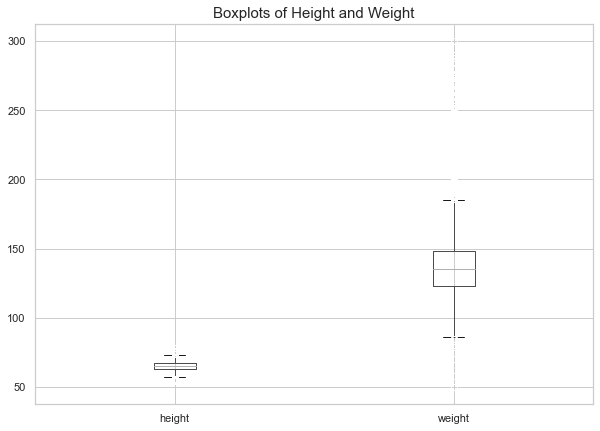

In [154]:
plt.figure(figsize=(10,7))
df[['height','weight']].boxplot()
plt.title("Boxplots of Height and Weight", fontsize=15)
plt.show()

In [155]:
# Check for missing values in each column of the dataset
df.isnull().sum()

fit               0
bust size     18329
weight        29894
rating            0
rented for       10
body type     14593
category          0
height         1413
size              0
age               0
dtype: int64

In [156]:
df[['height','weight','age']].describe().T

,count,mean,std,min,25%,50%,75%,max
height,190382.0,65.311994,2.663903,54.0,63.0,65.0,67.0,78.0
weight,161901.0,137.398521,21.902048,50.0,123.0,135.0,148.0,300.0
age,191795.0,33.750692,7.648927,17.0,29.0,32.0,37.0,64.0


Observation: significant people lying in the weight range 135 to 148 (as seen in the third quartile) and in height range 65 to 67


In [157]:
# Impute the null values of weight with mean
df['weight'].fillna(df['weight'].median(), inplace=True)

In [158]:
# Impute the null values of weight with mean
df['height'].fillna(df['height'].median(), inplace=True)

In [159]:
# Check for missing values in each column of the dataset
df.isnull().sum()

fit               0
bust size     18329
weight            0
rating            0
rented for       10
body type     14593
category          0
height            0
size              0
age               0
dtype: int64

In [160]:
df.head(5)

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,fit,34d,137.0,10.0,vacation,hourglass,romper,68.0,14,28.0
1,fit,34b,132.0,10.0,other,straight & narrow,gown,66.0,12,36.0
3,fit,34c,135.0,8.0,formal affair,pear,dress,69.0,8,34.0
4,fit,34b,145.0,10.0,wedding,athletic,gown,68.0,12,27.0
5,fit,32b,138.0,8.0,date,athletic,dress,63.0,8,45.0


In [161]:
# Check for types of value count in column of the 'bust size'
df['bust size'].value_counts()

34b    27216
34c    23080
34d    18000
36c    13456
32d    11158
       ...  
28h        1
46f        1
42j        1
28i        1
44h        1
Name: bust size, Length: 106, dtype: int64

In [162]:
# Check for types of value count in column of the 'body type'
df['body type'].value_counts()

hourglass            55157
athletic             43533
petite               22044
pear                 22040
full bust            14905
straight & narrow    14677
apple                 4846
Name: body type, dtype: int64

In [163]:
# Check for types of value count in column of the 'rented for'
df['rented for'].value_counts()

wedding            57603
formal affair      40193
party              35470
everyday           16754
other              15309
work               15020
date                7372
vacation            4063
party: cocktail        1
Name: rented for, dtype: int64

In [164]:
# Impute the null values of 'bust size' with all the possible customer value "34d"
df['bust size'].fillna(df['bust size'].mode()[0], inplace=True)

In [165]:
# Impute the null values of 'bust size' with all the possible customer value "hourglass"
df['body type'].fillna(df['body type'].mode()[0], inplace=True)

In [166]:
df.head(5)

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,fit,34d,137.0,10.0,vacation,hourglass,romper,68.0,14,28.0
1,fit,34b,132.0,10.0,other,straight & narrow,gown,66.0,12,36.0
3,fit,34c,135.0,8.0,formal affair,pear,dress,69.0,8,34.0
4,fit,34b,145.0,10.0,wedding,athletic,gown,68.0,12,27.0
5,fit,32b,138.0,8.0,date,athletic,dress,63.0,8,45.0


In [167]:
# Impute the null values of 'bust size' with all the possible customer value "wedding"
df['rented for'].fillna(df['rented for'].mode()[0], inplace=True)

In [168]:
# Check for types of value count in column of the 'rented for'
df['rented for'].value_counts()

wedding            57613
formal affair      40193
party              35470
everyday           16754
other              15309
work               15020
date                7372
vacation            4063
party: cocktail        1
Name: rented for, dtype: int64

In [169]:
# Check for missing values in each column of the dataset
df.isnull().sum()

fit           0
bust size     0
weight        0
rating        0
rented for    0
body type     0
category      0
height        0
size          0
age           0
dtype: int64

In [170]:
df.head(5)

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,fit,34d,137.0,10.0,vacation,hourglass,romper,68.0,14,28.0
1,fit,34b,132.0,10.0,other,straight & narrow,gown,66.0,12,36.0
3,fit,34c,135.0,8.0,formal affair,pear,dress,69.0,8,34.0
4,fit,34b,145.0,10.0,wedding,athletic,gown,68.0,12,27.0
5,fit,32b,138.0,8.0,date,athletic,dress,63.0,8,45.0


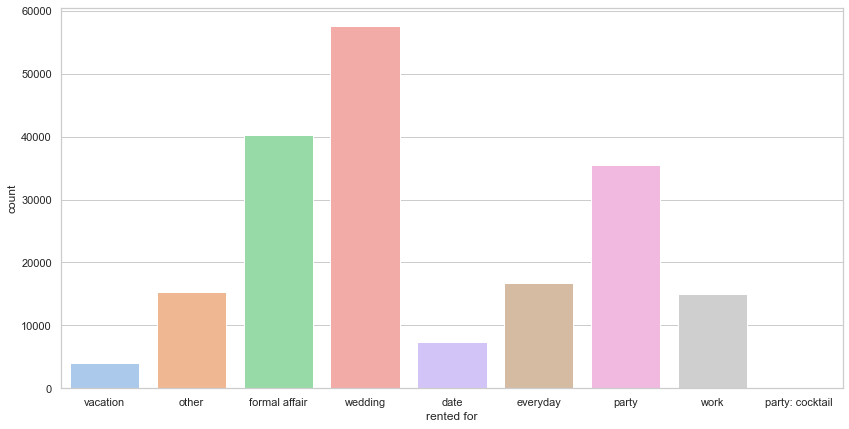

In [171]:
# Distribution of the different categories in the column of 'rented for'
plt.figure(figsize=(14,7))
sns.countplot(data=df,x='rented for', palette='pastel')
plt.show()

# Data Preparation for model building

In [172]:
dc=df

In [173]:
dc.corr()

,weight,rating,height,size,age
weight,1.000000,-0.021058,-0.002874,0.723741,0.068379
rating,-0.021058,1.000000,-0.003106,-0.036913,-0.036985
height,-0.002874,-0.003106,1.000000,-0.001534,0.000804
size,0.723741,-0.036913,-0.001534,1.000000,0.157528
age,0.068379,-0.036985,0.000804,0.157528,1.000000


In [174]:
dc.head(5)

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,fit,34d,137.0,10.0,vacation,hourglass,romper,68.0,14,28.0
1,fit,34b,132.0,10.0,other,straight & narrow,gown,66.0,12,36.0
3,fit,34c,135.0,8.0,formal affair,pear,dress,69.0,8,34.0
4,fit,34b,145.0,10.0,wedding,athletic,gown,68.0,12,27.0
5,fit,32b,138.0,8.0,date,athletic,dress,63.0,8,45.0


In [175]:
# very high correlation between weight and size, so drop the size column
dc.drop(columns=['size'],inplace=True)

In [176]:
# drop the redundant 'body type' column
dc.drop(columns=['body type'],inplace=True)

In [177]:
dc.head(5)

,fit,bust size,weight,rating,rented for,category,height,age
0,fit,34d,137.0,10.0,vacation,romper,68.0,28.0
1,fit,34b,132.0,10.0,other,gown,66.0,36.0
3,fit,34c,135.0,8.0,formal affair,dress,69.0,34.0
4,fit,34b,145.0,10.0,wedding,gown,68.0,27.0
5,fit,32b,138.0,8.0,date,dress,63.0,45.0


In [178]:
# clusteing would be a bit difficult for "busti ize". Split and Encode the categorical variables

dc["band_size"] = dc["bust size"].str.extract("([0-9]+)", expand=True).apply(pd.to_numeric)

In [179]:
dc["cup_size"] = dc["bust size"].str.extract("([a-z]+)", expand=True)

In [180]:
# drop the 'bust size' column
dc.drop(columns=['bust size'],inplace=True)

In [181]:
dc['band_size'].describe()

count    191795.000000
mean         34.179817
std           1.659816
min          28.000000
25%          34.000000
50%          34.000000
75%          36.000000
max          48.000000
Name: band_size, dtype: float64

In [182]:
dc['band_size'].value_counts()

34    100162
32     41041
36     39275
38      9473
30       831
40       446
28       284
42       193
44        77
46         8
48         5
Name: band_size, dtype: int64

In [183]:
dc['cup_size'].value_counts()

b      67256
c      49469
d      48749
a      15205
dd      6693
ddd     2596
aa       705
f        457
g        439
h        156
i         40
j         30
Name: cup_size, dtype: int64

In [184]:
dc['cup_size'].replace({'dd':'e','ddd':'f'}, inplace=True)

In [185]:
dc['cup_size'].value_counts()

b     67256
c     49469
d     48749
a     15205
e      6693
f      3053
aa      705
g       439
h       156
i        40
j        30
Name: cup_size, dtype: int64

In [186]:
# Tha LabelEncoder() encodes data on the basis of alphabetical ordering. So it will take 'a' before 'aa' by default
# which will be out of order.So, before label encoding I will rename 'a' as 'ab', so encoding goes as expected

dc['cup_size'].replace({'a':'ab'}, inplace=True)

In [187]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.cluster import KMeans
from scipy.stats import zscore
from scipy.spatial import distance
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer

In [188]:
le = LabelEncoder()
dc['cup_size'] = le.fit_transform(dc['cup_size'])
dc['cup_size'].value_counts()

2     67256
3     49469
4     48749
1     15205
5      6693
6      3053
0       705
7       439
8       156
9        40
10       30
Name: cup_size, dtype: int64

In [189]:
dc['bust_size'] = dc['band_size'] + dc['cup_size']

In [190]:
dc['bust_size'].describe()

count    191795.000000
mean         37.046857
std           2.125238
min          28.000000
25%          36.000000
50%          37.000000
75%          38.000000
max          53.000000
Name: bust_size, dtype: float64

In [191]:
dc.drop(columns=['cup_size'],inplace=True)

<AxesSubplot:xlabel='band_size', ylabel='bust_size'>

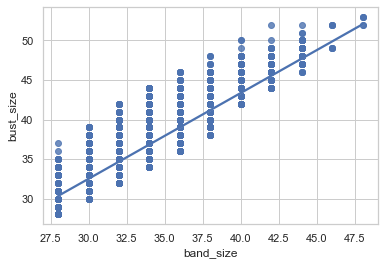

In [192]:
# Analyze the relation
sns.regplot(data=dc,x='band_size',y='bust_size')

In [193]:
# To avoid with correlation
dc['chest'] = dc['bust_size'] * dc['band_size']
dc.drop(columns=['bust_size','band_size'],inplace=True)

In [194]:
dc['chest'].describe()

count    191795.000000
mean       1269.244433
std         131.376951
min         784.000000
25%        1190.000000
50%        1258.000000
75%        1360.000000
max        2544.000000
Name: chest, dtype: float64

In [195]:
dc.head(5)

,fit,weight,rating,rented for,category,height,age,chest
0,fit,137.0,10.0,vacation,romper,68.0,28.0,1292
1,fit,132.0,10.0,other,gown,66.0,36.0,1224
3,fit,135.0,8.0,formal affair,dress,69.0,34.0,1258
4,fit,145.0,10.0,wedding,gown,68.0,27.0,1224
5,fit,138.0,8.0,date,dress,63.0,45.0,1088


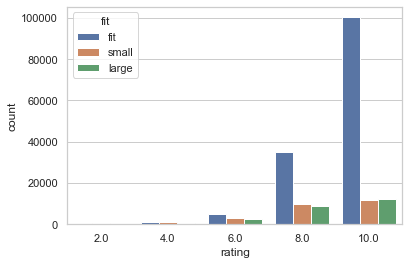

In [196]:
# Check relatio b/w fit and rating
sns.countplot(data=dc,x='rating',hue='fit')
plt.show()

In [197]:
pd.DataFrame(dc.groupby("fit")["rating"].value_counts())

rating
fit   rating        
fit   10.0    100395
      8.0      34850
      6.0       4970
      4.0        995
      2.0        289
large 10.0     12048
      8.0       8771
      6.0       2703
      4.0        798
      2.0        313
small 10.0     11658
      8.0       9593
      6.0       2985
      4.0        989
      2.0        438

In [198]:
# converting the feature fit into a binary one
dc["fit"] = np.where((dc["fit"] == 'fit'), 1, 0)

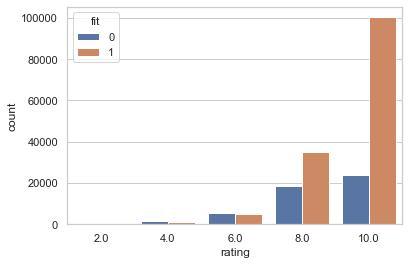

In [199]:
sns.countplot(data=dc,x='rating',hue='fit')
plt.show()

In [200]:
pd.DataFrame(dc.groupby("rating")["fit"].value_counts())

fit
rating fit        
2.0    0       751
       1       289
4.0    0      1787
       1       995
6.0    0      5688
       1      4970
8.0    1     34850
       0     18364
10.0   1    100395
       0     23706

In [201]:
dc['response'] = dc['rating'] * (dc['fit']+1)

In [202]:
dc.drop(columns=['rating','fit'],inplace=True)

In [203]:
dc.head(5)

,weight,rented for,category,height,age,chest,response
0,137.0,vacation,romper,68.0,28.0,1292,20.0
1,132.0,other,gown,66.0,36.0,1224,20.0
3,135.0,formal affair,dress,69.0,34.0,1258,16.0
4,145.0,wedding,gown,68.0,27.0,1224,20.0
5,138.0,date,dress,63.0,45.0,1088,16.0


In [204]:
# Analyze the 'rented for' data
dc['rented for'].value_counts()

wedding            57613
formal affair      40193
party              35470
everyday           16754
other              15309
work               15020
date                7372
vacation            4063
party: cocktail        1
Name: rented for, dtype: int64

In [205]:
df.rename(columns={'rented for':'rented_for'}, inplace=True)

In [206]:
dc.loc[dc.rented_for=='party: cocktail','rented_for'] = 'party'

In [207]:
dc.loc[dc.rented_for=='date','rented_for'] = 'party'

In [208]:
# Renamig 'formal affair' to 'formal'
dc['rented_for'].replace({'formal affair':'formal'},inplace=True)

In [209]:
dc.loc[dc.rented_for=='work','rented_for'] = 'formal'

In [210]:
dc['rented_for'].value_counts()

wedding     57613
formal      55213
party       42843
everyday    16754
other       15309
vacation     4063
Name: rented_for, dtype: int64

In [211]:
dc.loc[dc.rented_for=='vacation','rented_for'] = 'everyday'
dc.loc[dc.rented_for=='other','rented_for'] = 'everyday'

In [212]:
dc['rented_for'].value_counts()

wedding     57613
formal      55213
party       42843
everyday    36126
Name: rented_for, dtype: int64

In [213]:
dc.head(5)

,weight,rented_for,category,height,age,chest,response
0,137.0,everyday,romper,68.0,28.0,1292,20.0
1,132.0,everyday,gown,66.0,36.0,1224,20.0
3,135.0,formal,dress,69.0,34.0,1258,16.0
4,145.0,wedding,gown,68.0,27.0,1224,20.0
5,138.0,party,dress,63.0,45.0,1088,16.0


In [214]:
# Analyze the 'category' data
dc['category'].value_counts()

dress         92560
gown          44160
sheath        19227
shift          5349
jumpsuit       5168
              ...  
caftan            4
overcoat          2
sweatpants        2
crewneck          1
buttondown        1
Name: category, Length: 68, dtype: int64

In [215]:
# clusteing would be a bit difficult with 68 class category. Keep 'dress', 'gown', 'sheath' category
# Club remaining categories to 'others'

dc['category'] = [x if x in {'dress','gown','sheath'} else 'others' for x in dc['category']]

In [216]:
dc['category'].value_counts()

dress     92560
gown      44160
others    35848
sheath    19227
Name: category, dtype: int64

In [217]:
dp = dc

In [218]:
dc.head()

,weight,rented_for,category,height,age,chest,response
0,137.0,everyday,others,68.0,28.0,1292,20.0
1,132.0,everyday,gown,66.0,36.0,1224,20.0
3,135.0,formal,dress,69.0,34.0,1258,16.0
4,145.0,wedding,gown,68.0,27.0,1224,20.0
5,138.0,party,dress,63.0,45.0,1088,16.0


In [219]:
le = LabelEncoder()

In [220]:
to_be_encoded = dp.select_dtypes(include='object').columns

In [221]:
for feature in to_be_encoded:
  dp[feature] = le.fit_transform(dp[feature])

In [222]:
dp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191795 entries, 0 to 192543
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   weight      191795 non-null  float64
 1   rented_for  191795 non-null  int32  
 2   category    191795 non-null  int32  
 3   height      191795 non-null  float64
 4   age         191795 non-null  float64
 5   chest       191795 non-null  int64  
 6   response    191795 non-null  float64
dtypes: float64(4), int32(2), int64(1)
memory usage: 10.2 MB


In [223]:
dp.head()

,weight,rented_for,category,height,age,chest,response
0,137.0,0,2,68.0,28.0,1292,20.0
1,132.0,0,1,66.0,36.0,1224,20.0
3,135.0,1,0,69.0,34.0,1258,16.0
4,145.0,3,1,68.0,27.0,1224,20.0
5,138.0,2,0,63.0,45.0,1088,16.0


In [224]:
## Standardization
scaled_features = StandardScaler().fit_transform(dp.values)
dp = pd.DataFrame(scaled_features, index=dp.index, columns=dp.columns)

In [230]:
dp.head()

,weight,rented_for,category,height,age,chest,response
0,-0.001225,-1.487674,1.063029,1.013603,-0.751832,0.173209,0.808214
1,-0.249467,-1.487674,0.092399,0.260080,0.294069,-0.344387,0.808214
3,-0.100522,-0.578226,-0.878230,1.390364,0.032594,-0.085589,0.008046
4,0.395962,1.240670,0.092399,1.013603,-0.882569,-0.344387,0.808214
5,0.048423,0.331222,-0.878230,-0.870204,1.470708,-1.379579,0.008046


In [231]:
dp.corr()

,weight,rented_for,category,height,age,chest,response
weight,1.000000,0.020907,-0.005556,-0.002874,0.068379,0.580205,-0.018027
rented_for,0.020907,1.000000,-0.080671,0.002583,-0.084526,0.005369,0.029089
category,-0.005556,-0.080671,1.000000,0.001151,0.023681,-0.004877,0.018451
height,-0.002874,0.002583,0.001151,1.000000,0.000804,-0.002693,-0.002551
age,0.068379,-0.084526,0.023681,0.000804,1.000000,0.168020,-0.013073
chest,0.580205,0.005369,-0.004877,-0.002693,0.168020,1.000000,-0.016789
response,-0.018027,0.029089,0.018451,-0.002551,-0.013073,-0.016789,1.000000


In [232]:
dl = dp

In [233]:
dp.to_csv('prepared_renttherunway.csv')

# Principal Component Analysis and Clustering

In [235]:
## Calculating covariance matrix
cov_matrix = np.cov(dl.T)
print('Covariance matrix','\n',cov_matrix)

Covariance matrix 
 [[ 1.00000521e+00  2.09068654e-02 -5.55571915e-03 -2.87378600e-03
   6.83792684e-02  5.80207641e-01 -1.80272568e-02]
 [ 2.09068654e-02  1.00000521e+00 -8.06711529e-02  2.58301648e-03
  -8.45267630e-02  5.36857131e-03  2.90890083e-02]
 [-5.55571915e-03 -8.06711529e-02  1.00000521e+00  1.15053916e-03
   2.36806912e-02 -4.87698693e-03  1.84511230e-02]
 [-2.87378600e-03  2.58301648e-03  1.15053916e-03  1.00000521e+00
   8.04208898e-04 -2.69310426e-03 -2.55073258e-03]
 [ 6.83792684e-02 -8.45267630e-02  2.36806912e-02  8.04208898e-04
   1.00000521e+00  1.68020676e-01 -1.30727120e-02]
 [ 5.80207641e-01  5.36857131e-03 -4.87698693e-03 -2.69310426e-03
   1.68020676e-01  1.00000521e+00 -1.67890460e-02]
 [-1.80272568e-02  2.90890083e-02  1.84511230e-02 -2.55073258e-03
  -1.30727120e-02 -1.67890460e-02  1.00000521e+00]]


In [236]:
## Calculating eigen values and eigen vectors
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen vectors:','\n',eig_vecs)
print('\n')
print('Eigen values:','\n',eig_vals)

Eigen vectors: 
 [[-6.70956922e-01 -6.89071870e-01 -1.32116087e-01  1.57405095e-01
   1.72527031e-01 -5.38093830e-02  1.02331082e-02]
 [ 8.73367034e-03  1.00077302e-03 -6.98746768e-01 -6.98290371e-01
   1.03902572e-01 -1.08027684e-01  4.00063464e-02]
 [ 1.64949649e-03  4.64232899e-03  5.32194953e-01 -3.69620275e-01
   6.37347719e-01 -4.08025131e-01  8.61886902e-02]
 [ 5.58121070e-03  4.23119793e-05 -3.50309863e-04  3.06598809e-02
  -1.69225497e-02  1.53939968e-01  9.87443573e-01]
 [-2.61017762e-01 -1.23807839e-01  4.44006479e-01 -5.56140578e-01
  -6.34214832e-01  8.85747623e-02 -5.77141909e-03]
 [-6.92576716e-01  7.14013641e-01 -5.35344476e-02  5.98474621e-02
   5.02568179e-02 -3.83452506e-02  8.84594921e-03]
 [ 4.37479223e-02 -3.68011432e-03 -1.05161841e-01  1.92823639e-01
  -3.84949336e-01 -8.86530711e-01  1.25339198e-01]]


Eigen values: 
 [1.62645046 0.41099317 1.12390233 0.87666563 0.95022639 1.01197062
 0.99982791]


In [237]:
total = sum(eig_vals)
var_exp = [ (i/total)*100  for i in sorted(eig_vals,reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print('Variance Explained: ',var_exp)
print('Cummulative Variance Explained: ',cum_var_exp)

Variance Explained:  [23.234885360971713, 16.055663788814005, 14.456647709443349, 14.283181372791725, 13.574591999664554, 12.523729445064498, 5.871300323250147]
Cummulative Variance Explained:  [ 23.23488536  39.29054915  53.74719686  68.03037823  81.60497023
  94.12869968 100.        ]


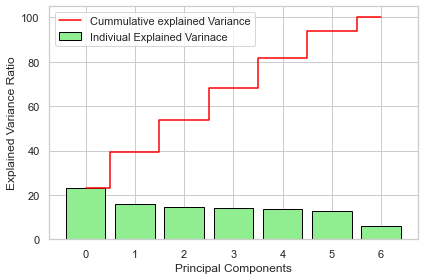

In [238]:
plt.bar(range(7),var_exp, align='center',color='lightgreen',edgecolor='black',label='Indiviual Explained Varinace')
plt.step(range(7), cum_var_exp, where='mid',color='red',label='Cummulative explained Variance')
plt.legend(loc = 'best')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.tight_layout()
plt.show()

We can see that approximately 93.5% of variance is explained by the first 6 features.

so, we can choose the optimal number of principal components as 6.

In [239]:
pca=PCA(n_components = 6)
pca.fit(dl)

PCA(n_components=6)

In [240]:
# Transformed dataset after PCA is dpca.
dpca = pca.transform(dl)
dpca = pd.DataFrame(dpca,columns=['PC1','PC2','PC3','PC4','PC5','PC6'])
dpca.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,-0.106879,1.176968,-0.906674,1.140140,0.679988,-1.261128
1,-0.353108,1.185561,-0.500784,0.299266,-0.658056,-0.945070
2,-0.119829,-0.032355,0.639282,1.273115,-0.688758,-0.733489
3,-0.255210,-1.328831,-0.818474,1.165874,0.470270,0.181033
4,-0.536033,0.021090,0.362029,-0.940908,-1.507418,0.824669


# K-means clustering and segment the data

In [241]:
cluster_range = range(1,12)
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, init='k-means++', n_init=20, random_state=42)
    clusters.fit(dpca)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({'num_clusters':cluster_range, 
                           'cluster_errors':cluster_errors})

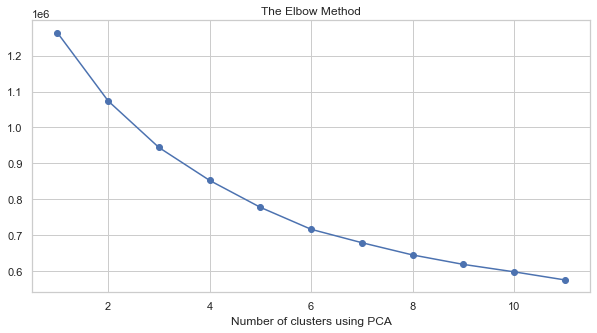

In [242]:
# Elbow method
plt.figure(figsize=[10,5])
plt.title('The Elbow Method')
plt.xlabel('Number of clusters using PCA')
plt.plot(clusters_df['num_clusters'],clusters_df['cluster_errors'],marker='o',color='b')
plt.show()

From the Elbow plot, we can see that at K= 5 or 6, the interia starts to drop significantly.

We also calculate Silhoutte Scores for various possible clusters. We find that 5 gives us the best value. 
So, we will go ahead with 5 clusters. The clusters are labeled as 0,1,2,3,4.

In [243]:
# Build a Kmeans clustering model using the obtained optimal K value from the elbow plot
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=20, random_state=42)
kmeans.fit(dpca)

KMeans(n_clusters=5, n_init=20, random_state=42)

In [244]:
# Creating a new dataframe only for labels and converting it into categorical variables.

df_labels = pd.DataFrame(kmeans.labels_, columns=list(['Labels']))
df_labels['Labels'] = df_labels['Labels'].astype('category')

# joining the label dataframe with unscaled initial dataframe.(df)

df_kmeans = dl.join(df_labels)
df_kmeans.head()

,weight,rented_for,category,height,age,chest,response,Labels
0,-0.001225,-1.487674,1.063029,1.013603,-0.751832,0.173209,0.808214,4
1,-0.249467,-1.487674,0.092399,0.260080,0.294069,-0.344387,0.808214,0
3,-0.100522,-0.578226,-0.878230,1.390364,0.032594,-0.085589,0.008046,0
4,0.395962,1.240670,0.092399,1.013603,-0.882569,-0.344387,0.808214,2
5,0.048423,0.331222,-0.878230,-0.870204,1.470708,-1.379579,0.008046,0


In [248]:
df_kmeans['Labels'].value_counts()

0    67370
1    40002
4    34419
3    25581
2    23678
Name: Labels, dtype: int64

Computing silhouette score for evaluating the quality of the K Means clustering technique

In [249]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [250]:
# Limit the study of clusters from 5 to 7

kmeans_score = []

for i in range(4,9):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)
    kmeans = kmeans.fit(dpca)
    labels = kmeans.predict(dpca)
    print(i, ' ', silhouette_score(dpca,labels))

4   0.1636424260648133
5   0.17038012398976338
6   0.1628109854461838
7   0.16862855071952815
8   0.15954769586395973


From above, we can observe that for 5 and 6 clusters the silhoutte score is highest, we can choose optimal clusters as 5 or 6.

# Agglomerative clustering and segment the data

In [267]:
dpca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191795 entries, 0 to 191794
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   PC1     191795 non-null  float64
 1   PC2     191795 non-null  float64
 2   PC3     191795 non-null  float64
 3   PC4     191795 non-null  float64
 4   PC5     191795 non-null  float64
 5   PC6     191795 non-null  float64
dtypes: float64(6)
memory usage: 8.8 MB


In [276]:
dac = dpca.sample(frac=0.10)

In [277]:
dac.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19180 entries, 18756 to 37267
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     19180 non-null  float64
 1   PC2     19180 non-null  float64
 2   PC3     19180 non-null  float64
 3   PC4     19180 non-null  float64
 4   PC5     19180 non-null  float64
 5   PC6     19180 non-null  float64
dtypes: float64(6)
memory usage: 1.0 MB


In [278]:
from scipy.cluster.hierarchy import ward, fcluster
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial import distance

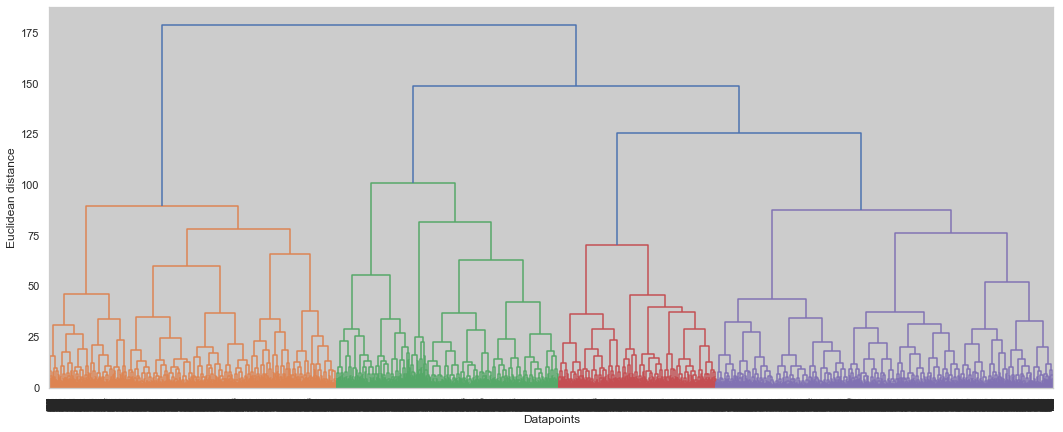

In [279]:
plt.figure(figsize=[18,7])
merg = linkage(dac, method='ward')
dendrogram(merg, leaf_rotation=90,)
plt.xlabel('Datapoints')
plt.ylabel('Euclidean distance')
plt.show()

In [282]:
# Build a Agglomerative clustering model using the optimal clusters as 4
hie_cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean',
                                     linkage='ward')
hie_cluster_model = hie_cluster.fit(dac)

In [283]:
## Creating a dataframe of the labels
df_label1 = pd.DataFrame(hie_cluster_model.labels_,columns=['Labels'])
df_label1.head(5)

,Labels
0,2
1,1
2,2
3,3
4,0


In [285]:
## joining the label dataframe with unscaled initial dataframe.(df)

df_hier = dc.join(df_label1)
df_hier.head()

,weight,rented_for,category,height,age,chest,response,Labels
0,137.0,0,2,68.0,28.0,1292,20.0,2.0
1,132.0,0,1,66.0,36.0,1224,20.0,1.0
3,135.0,1,0,69.0,34.0,1258,16.0,3.0
4,145.0,3,1,68.0,27.0,1224,20.0,0.0
5,138.0,2,0,63.0,45.0,1088,16.0,0.0


Compute silhouette score for evaluating the quality of the Agglomerative clustering technique

In [ ]:
for i in range(2,15):
    hier = AgglomerativeClustering(n_clusters=i)
    hier = hier.fit(dac)
    labels = hier.fit_predict(dac)
    print(i,silhouette_score(dac,labels))

2 0.15876204702354604
3 0.13953984686363838
4 0.1182987661272727
5 0.11745360493579636
6 0.1262743676203365


From above, we can observe that the silhouette score is highest for 6.